<a href="https://colab.research.google.com/github/amriikk/smartphone-teens/blob/main/HW_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Age,3000.0,15.969667,1.989489,13.0,14.00,16.0,18.00,19.0
Daily_Usage_Hours,3000.0,5.020667,1.956501,0.0,3.70,5.0,6.40,11.5
Sleep_Hours,3000.0,6.489767,1.490713,3.0,5.50,6.5,7.50,10.0
Academic_Performance,3000.0,74.947333,14.684156,50.0,62.00,75.0,88.00,100.0
Social_Interactions,3000.0,5.097667,3.139333,0.0,2.00,5.0,8.00,10.0
Exercise_Hours,3000.0,1.040667,0.734620,0.0,0.50,1.0,1.50,4.0
Anxiety_Level,3000.0,5.590000,2.890678,1.0,3.00,6.0,8.00,10.0
Depression_Level,3000.0,5.460333,2.871557,1.0,3.00,5.0,8.00,10.0
Self_Esteem,3000.0,5.546333,2.860754,1.0,3.00,6.0,8.00,10.0


R square for Anxiety Level:
Anxiety_Level             1.000000
Time_on_Education         0.000607
Depression_Level          0.000346
Phone_Checks_Per_Day      0.000324
Addiction_Level           0.000256
Time_on_Gaming            0.000215
Age                       0.000215
Parental_Control          0.000133
Family_Communication      0.000123
Sleep_Hours               0.000097
ID                        0.000078
Apps_Used_Daily           0.000055
Daily_Usage_Hours         0.000052
Weekend_Usage_Hours       0.000045
Screen_Time_Before_Bed    0.000022
Exercise_Hours            0.000020
Social_Interactions       0.000019
Self_Esteem               0.000016
Academic_Performance      0.000012
Time_on_Social_Media      0.000007
Name: Anxiety_Level, dtype: float64

R square for Depression Level:
Depression_Level          1.000000
Age                       0.002777
Time_on_Education         0.000819
Screen_Time_Before_Bed    0.000806
Self_Esteem               0.000710
Academic_Performance      0.0

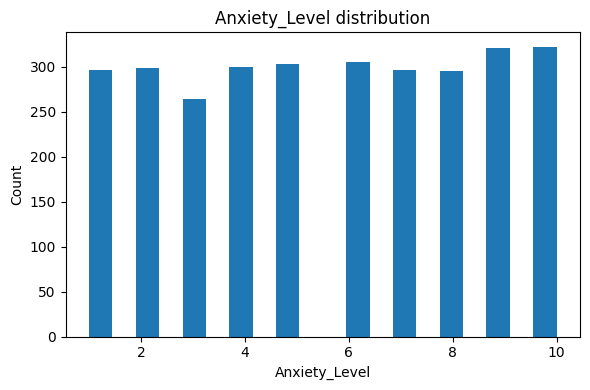


Summary of Depression_Level:
count    3000.000000
mean        5.460333
std         2.871557
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Depression_Level, dtype: float64


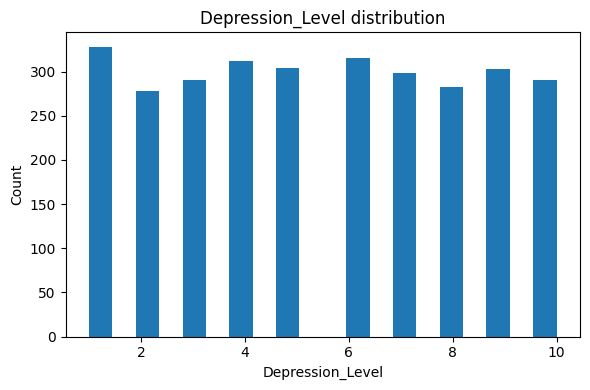

Bivariate Analysis:



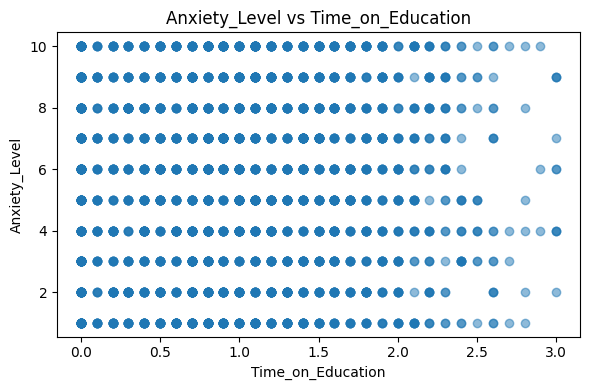

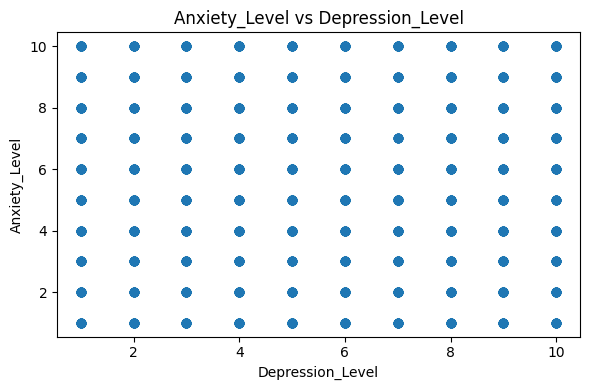

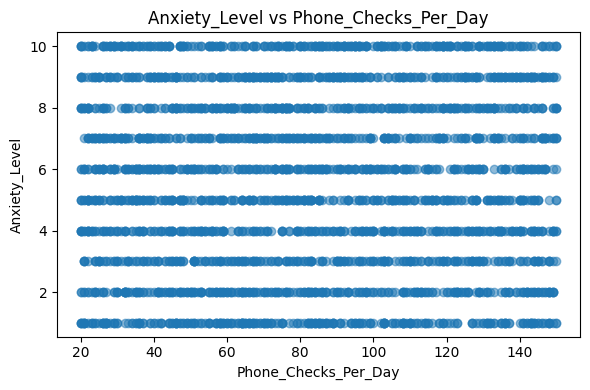

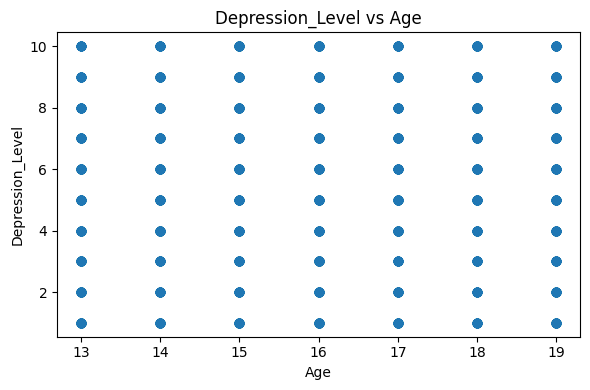

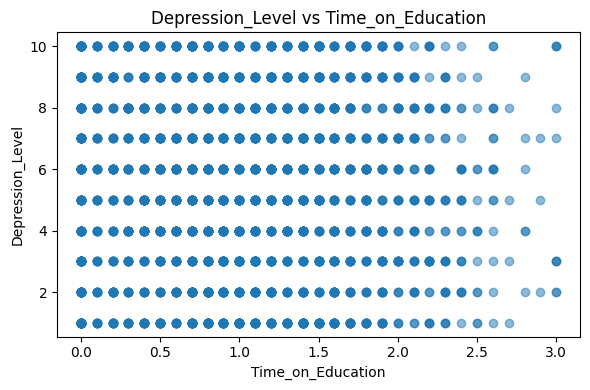

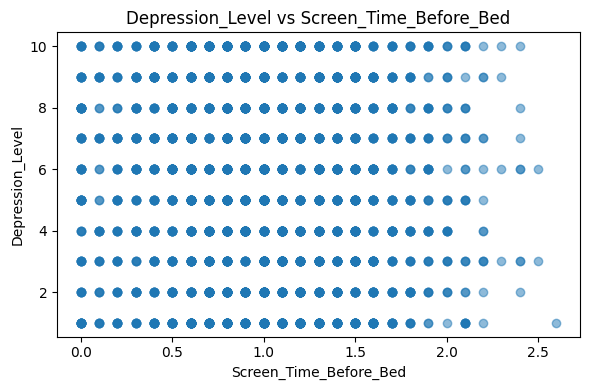

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('teen_phone_addiction_dataset.csv')
df.head()

# Numeric summary
display(df.describe().T)

targets = ["Anxiety_Level", "Depression_Level"]
print(f"R square for Anxiety Level:\n{(df.corr(numeric_only=True)["Anxiety_Level"]**2).sort_values(ascending=False)}")
print(f"\nR square for Depression Level:\n{(df.corr(numeric_only=True)["Depression_Level"]**2).sort_values(ascending=False)}")

# Univariate Analysis:
for t in targets:
    s = df[t]
    # print("Missing:", s.isna().sum())
    # print("Unique:", s.nunique(dropna=True))

    if np.issubdtype(s.dropna().dtype, np.number):
        print(f"\nSummary of {t}:\n{s.describe()}")
        plt.figure(figsize=(6,4))
        plt.hist(s.dropna(), bins=20)
        plt.title(f"{t} distribution")
        plt.xlabel(t); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print(f"\nSummary of {t}:\n{s.value_counts(dropna=False)}")
        vc = s.value_counts(dropna=False).head(15)
        plt.figure(figsize=(7,4))
        plt.bar(vc.index.astype(str), vc.values)
        plt.title(f"{t} counts (top 15)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

# Bivariate analysis
print(f"Bivariate Analysis:\n")
num_cols = df.select_dtypes(include=[np.number]).columns
for t in targets:
    candidates = [c for c in num_cols if c != t]
    for n in range(3):  #plotting against top 3 R sq. values
      best_x = df[candidates].corrwith(df[t]).abs().sort_values(ascending=False).index[n]
      plt.figure(figsize=(6,4))
      plt.scatter(df[best_x], df[t], alpha=0.5)
      plt.xlabel(best_x)
      plt.ylabel(t)
      plt.title(f"{t} vs {best_x}")
      plt.tight_layout()
      plt.show()